# 00 Numerical Differentiation

In [15]:
delta = 1.
while(delta>1e-10):
    x=1.
    d=(x+delta)*(x+delta)-x*x
    d=d/delta
    print("%e %20.15f %20.15f" %(delta,d,d-2))
    delta=delta/10

1.000000e+00    3.000000000000000    1.000000000000000
1.000000e-01    2.100000000000002    0.100000000000002
1.000000e-02    2.010000000000001    0.010000000000001
1.000000e-03    2.000999999999697    0.000999999999697
1.000000e-04    2.000099999999172    0.000099999999172
1.000000e-05    2.000010000013930    0.000010000013930
1.000000e-06    2.000000999924367    0.000000999924367
1.000000e-07    2.000000101087806    0.000000101087806
1.000000e-08    1.999999987845058   -0.000000012154942
1.000000e-09    2.000000165480742    0.000000165480742
1.000000e-10    2.000000165480742    0.000000165480742


In [17]:
from math import sin, sqrt, pi
delta=1.
while(delta>1.e-10):
    x=pi/4
    d1=sin(x+delta)-sin(x)
    d2=sin(x+delta*.5)-sin(x-delta*.5)
    d1=d1/delta
    d2=d2/delta
    print("%6.0e %20.16f %20.16f %20.16f %20.16f" % (delta, d1, d1-sqrt(2.)/2., d2, d2-sqrt(2.)/2.) )
    delta = delta / 10.

 1e+00   0.2699544827129282  -0.4371522984736194   0.6780100988420897  -0.0290966823444578
 1e-01   0.6706029729039897  -0.0365038082825578   0.7068121901873392  -0.0002945909992084
 1e-02   0.7035594916892096  -0.0035472894973380   0.7071038349119818  -0.0000029462745658
 1e-03   0.7067531099743674  -0.0003536712121802   0.7071067517236962  -0.0000000294628514
 1e-04   0.7070714246693033  -0.0000353565172443   0.7071067808916975  -0.0000000002948500
 1e-05   0.7071032456451575  -0.0000035355413901   0.7071067811836861  -0.0000000000028615
 1e-06   0.7071064277441862  -0.0000003534423614   0.7071067811281749  -0.0000000000583726
 1e-07   0.7071067453789935  -0.0000000358075540   0.7071067809061303  -0.0000000002804172
 1e-08   0.7071067842367994   0.0000000030502518   0.7071067731345692  -0.0000000080519784
 1e-09   0.7071068175434900   0.0000000363569425   0.7071068175434900   0.0000000363569425
 1e-10   0.7071077057219097   0.0000009245353622   0.7071065954988851  -0.0000001856876625

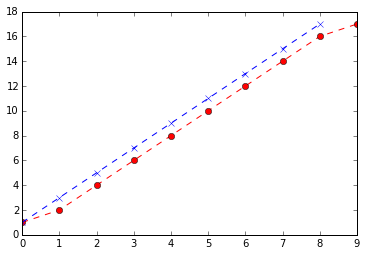

In [21]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
y=lambda x: x*x
x1=np.arange(0,10,1)
x2=np.arange(0,10,.1)

pyplot.plot(x1,np.gradient(y(x1),1.),'r--o')

pyplot.plot(x1[:x1.size-1],np.diff(y(x1))/np.diff(x1),'b--x')

In [38]:
from scipy.misc import derivative
from math import *
from decimal import Decimal
f=lambda x: x**2
delta=Decimal("1.")
while(delta>=Decimal("1e-10")):
    x=Decimal("1.")
    #d=derivative(f,x,delta,n=1,order=3) gives type error when used with Decimal type
    d = ((x+delta)*(x+delta)-x*x)/ delta
    print("%6.0e %20.16f %20.16f" % (delta, d, d-Decimal("2.")))
    delta = delta / Decimal("10.")

 1e+00   3.0000000000000000   1.0000000000000000
 1e-01   2.1000000000000001   0.1000000000000000
 1e-02   2.0099999999999998   0.0100000000000000
 1e-03   2.0009999999999999   0.0010000000000000
 1e-04   2.0001000000000002   0.0001000000000000
 1e-05   2.0000100000000001   0.0000100000000000
 1e-06   2.0000010000000001   0.0000010000000000
 1e-07   2.0000000999999998   0.0000001000000000
 1e-08   2.0000000099999999   0.0000000100000000
 1e-09   2.0000000010000001   0.0000000010000000
 1e-10   2.0000000001000000   0.0000000001000000


# 01 Euler

Given:$$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant."

Write: a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_0=83^{\circ} C$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

0.0     20.315
2.5     34.2114773602
5.0     45.0272801886
7.5     53.4453553447
10.0     59.9972489451
12.5     65.0966700068
15.0     69.065613453
17.5     72.1546919754
20.0     74.5589605792
22.5     76.4302330241
25.0     77.8866678656
27.5     79.0202293913
30.0     79.902494561
32.5     80.5891726213
35.0     81.1236227782
37.5     81.5395920465
40.0     81.8633461513
42.5     82.1153280365
45.0     82.311448702
47.5     82.4640918785
50.0     82.5828959796
52.5     82.6753627033
55.0     82.7473307155
57.5     82.8033443231


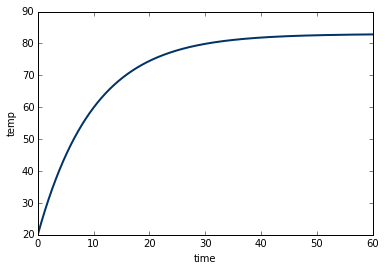

In [65]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
T0=20.   # initial temp
Te=83.   # intial environ temp
r=.1     # cooling const
dt=.05   # time step
tmax=60. # end time
steps=int(tmax/dt) #initialize steps
time=np.zeros(steps) #initialize time array
temp=np.zeros(steps) #initialize temperature array

T=T0
for i in range(0,steps):
    time[i]=i*dt
    temp[i]= T
    T=T-r*(T-Te)*dt
    if (i%50 ==0): #prints every 50 timesteps
        print i*dt,"   ", T
    
pyplot.plot(time, temp, color='#003366', ls='-', lw=2)
pyplot.xlabel('time')
pyplot.ylabel('temp')    
    

In [72]:
def euler(y, f, dx):
    return y + f*dx

T=T0 
for i in range (1, steps):
    T=euler(T, -r*(T-Te), dt)
    temp[i]=T

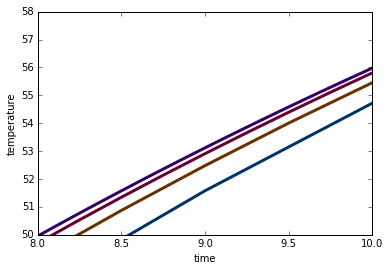

In [75]:
t0 = 10.   # initial temperature
ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)
dt = 1.
my_color = ['#003366','#663300','#660033','#330066']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    t = t0
    for i in range(1,nsteps):
        t = euler(t, -r*(t-ts), dt)
        my_temp[i] = t
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/2.

pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10)
pyplot.ylim(50,58);

### Challenge 1.1


at time= 10 with dt=              1.00000, the temp is        57.5464738727 degrees
at time= 10 with dt=              0.50000, the temp is        56.8305276642 degrees
at time= 10 with dt=              0.25000, the temp is        56.4840318882 degrees
at time= 10 with dt=              0.12500, the temp is        56.3135254846 degrees


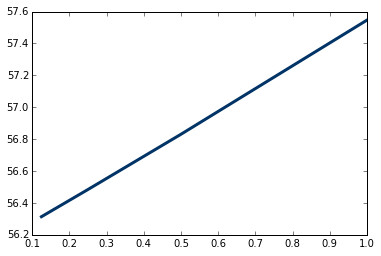

In [12]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

t0 = 10.   # initial temperature
ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)
dt = 1.
my_color = ['#003366','#663300','#660033','#330066']
euler = lambda y, f, dx: y + f*dx 
n=4
tempAxis=np.zeros(n)
dtAxis=np.zeros(n)


for j in range(0,n):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    t = t0
    for i in range(1,nsteps):
        t = euler(t, -r*(t-ts), dt)
        my_temp[i] = t
        if ((i*dt)==10):
            print("at time= %02d with dt= %20.5f, the temp is %20.10f degrees"% (i*dt, dt, t))
            tempAxis[j]=t
    dtAxis[j]=dt
    dt = dt/2.
    
pyplot.plot(dtAxis, tempAxis, '#003366', ls='-', lw=3)


# 02 Higher Order Methods

we obtain
$$y_{n+1}=y_n+\Delta x(\frac{3}{2}f_n-\frac{1}{2}f_{n-1})+O(\Delta x^3)$$
Note that the value of $y_0$ is not sufficient information to get this
algorithm started. The value of $y_1$ has to be obtained first by some
other procedure, like the ones described previously. This means that the
method is not **"self starting"**.

**Second Order Runge-Kutta Method** $$\begin{eqnarray}
k&=&\Delta x f(x_n,y_x), \\
y_{n+1}&=&y_n+\Delta x f(x+1/2\Delta x, y_n+1/2k) + O(\Delta 
x^3).\end{eqnarray}$$

**Fourth Order Runge-Kutta Method**
$$\begin{eqnarray}
 k_1&=&\Delta x f(x_n,y_n), \\
 k_2&=&\Delta x f(x_n+1/2\Delta x,y_n+1/2k_1), \\
 k_3&=&\Delta x f(x_n+1/2\Delta x,y_n+1/2k_2), \\
 k_4&=&\Delta x f(x_n+\Delta x,y_n+k_3), \\
 y_{n+1}&=&y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)+O(\Delta x^5).\end{eqnarray}$$


### Challenge 1.2

In [ ]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps
timeAxis = np.zeros(nsteps)
tempAxis = np.zeros(nsteps)
dt = 1.
my_color = ['#003366','#663300','#660033','#330066']
f= lambda r, t, ts: -r*(t-ts)

euler = lambda y, f, dx: y + f*dx
def rk4(y, f, r, ts, dt)
    k1=f(r,t,ts)*dt
    k2=f(r,t+dt/2,ts)*dt

    
    
    
n=4
tempAxis=np.zeros(n)
dtAxis=np.zeros(n)


for j in range(0,n):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    t = t0
    for i in range(1,nsteps):
        t = euler(t, f, dt)
        my_temp[i] = t
        if ((i*dt)==10):
            print("at time= %02d with dt= %20.5f, the temp is %20.10f degrees"% (i*dt, dt, t))
            tempAxis[j]=t
    dtAxis[j]=dt
    dt = dt/2.
    
pyplot.plot(dtAxis, tempAxis, '#003366', ls='-', lw=3)

# 03 Second Order ODEs: Equations of Motion 

## Exercise 1.2 and 1.3

wait... python is an object based programing language!?

Ok on to buisness:

Netforce on the falling object at any point is going to be $F_net=F_g-F_d=mg(1-\frac{v}{v_t})$, and 


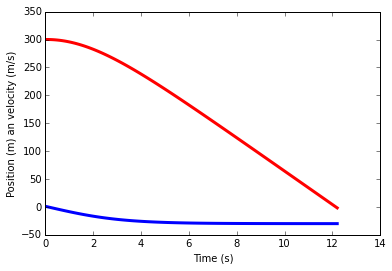

In [2]:
class particle1D(object):

    def __init__(self, m=1, y=0, v=0):
        self.m=m
        self.y=y
        self.v=v
    
    def euler(self, f, dt):
        self.v=self.v+(f/self.m)*dt
        self.y=self.y+self.v*dt
        
class particle2D(object):
    
    def __init__(self, m=1., x=0., y=0., vx=0., vy=0.):
        self.m = m
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.m*dt
        self.vy = self.vy + fy/self.m*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        
%matplotlib inline
import numpy as np
from matplotlib import pyplot

g=9.81
m=.01
y0=300.
y=[y0]
x0=0
x=[x0]
vy0=0
vy=[vy0]
vx0=0
vx=[vx0]
v0=(vy0**2+vx0**2)**(1/2)
v=[v0]
vt=30. #vt=v when Fg and Fd are equal
k2=m*g/vt**2

dt=.1
t=[0.]

Fg=m*g
ball=particle1D(m, y0, v0)

while ball.y>0.:
    Fd=k2*ball.v*abs(ball.v)
    Fy=-Fg-Fd
    ball.euler(Fy, dt)
    y.append(ball.y)
    v.append(ball.v)
    t.append(t[-1]+dt)

tAxis=np.array(t)
yAxis=np.array(y)
vAxis=np.array(v)

pyplot.plot(tAxis,yAxis, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('Time (s)')
pyplot.ylabel('Position (m) an velocity (m/s)')

#NEED TO ASK ABOUT HOW TO CREATE MULTIPLE PLOTS AT ONCE
pyplot.plot(tAxis, vAxis, color="#0000FF", ls='-', lw=3)
#pyplot.ylabel('position(m)');

## Exercise 1.5

**Challenge 1.2**

In [20]:
class particle1D(object):

    def __init__(self, m=1, y=0, v=0):
        self.m=m
        self.y=y
        self.v=v
    
    def euler(self, f, dt):
        self.v=self.v+(f/self.m)*dt
        self.y=self.y+self.v*dt
        
    def Fd(self, k2=0.):
        F=k2*self.v*abs(self.v)*1.
        return F
    
    def Fg_approx(self, g):
        F=self.m*g
        return F
    
    def Fg_real(self, g, R):
        F=m*g/(1+self.y/R)**2
        return F
    
    def finalv(self, o=1, g=9.81, R=6370000., dt=.1):
        while self.y>0.:
            if (o==1):
                Fy=-self.Fg_approx(g)-self.Fd()
            else:
                Fy=-self.Fg_real(g,R)-self.Fd()               
            self.euler(Fy, dt)
        return self.v
              

%matplotlib inline
import numpy as np
from matplotlib import pyplot as pyp

g=9.81
m=.01
R=6370000.
y0=10000.
v0=0
#v=0.
vt=30. 
#k2=m*g/vt**2
#k2=0.

dt=.1
dy=100.
diff=0. #the percent difference between the two y's
ball1=particle1D(m, y0, v0)
ball2=particle1D(m, y0, v0)
y1=[y0]
y2=[y0]


while diff<.01:
    ball1.y=y0
    ball1.v=v0
    ball2.y=y0
    ball2.v=v0
    o=1
    Finalv1=ball1.finalv(o, dt)
    o=2
    Finalv2=ball2.finalv(o, dt)
    diff=abs((Finalv1-Finalv2)/Finalv1)
    #print("%5.5f %5.5f %5.5f %5.5f"% (y0, Finalv1, Finalv2, diff))
    y0=y0+dy

print("In meters, the percent difference will be greater than or equal to 1% when the initial height is:")
print(y0)



In meters, the percent difference will be greater than or equal to 1% when the initial height is:
129300.0


In [ ]:
class particle2D(object):

    def __init__(self, m=1, x=, y=0, vx=0, vy=0):
        self.m=m
        self.x=x
        self.y=y
        self.vx=vx
        self.vy=vy
    
    def euler(self, Fx, Fy, dt):
        self.vx=self.vx+(Fx/self.m)*dt
        self.vy-self.vy+(Fy/self.m)*dt
        self.y=self.y+self.vy*dt
        self.x=self.x+self.vx*dt
        
    def Fd(self, k2=0.):
        F=k2*self.v*abs(self.v)*1.
        return F
    
    def Fg_approx(self, g):
        F=self.m*g
        return F
    
    def Fg_real(self, g, R):
        F=m*g/(1+self.y/R)**2
        return F
    
    def finalv(self, o=1, g=9.81, R=6370000., dt=.1):
        while self.y>0.:
            if (o==1):
                Fy=-self.Fg_approx(g)-self.Fd()
            else:
                Fy=-self.Fg_real(g,R)-self.Fd()               
            self.euler(Fy, dt)
        return self.v